## Data 620 Week 8 High Frequency Words
### Lin Li and Tony Mei


1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

In [1]:
# import libraries
import nltk
from __future__ import division
import nltk, re, pprint
import pandas as pd

### Selected corpus: Much Ado About Nothing

Much Ado About Nothing is a comedy by William Shakespeare that includes two different stories of romantic love.

In [2]:
# get text from url
from urllib.request import urlopen
url = "https://www.gutenberg.org/files/1519/1519-0.txt"
raw = urlopen(url).read()

# convert from byte type to string
text = raw.decode('UTF-8')
print(type(text))

<class 'str'>


Since the text is a play, we want to remove the names that appear before each dialogue to avoid inflating the frequency of these words. These names are in all caps in this version of the corpus, thus we can use regex to identity and then remove them.


In [3]:
# remove words with all upper cases such as BENEDICK, ACT, etc.
text = re.sub(r'\b[A-Z]+\b', '', text)

In [4]:
# tokenizing text
tokens = nltk.word_tokenize(text)
type(tokens)

list

In [5]:
# collapse case distinctions and ignore punctuation
word_list = [w.lower() for w in tokens if w.isalpha()]

# get number of unique words
len(set(word_list))

3262

In [6]:
# get the most common words used
nltk.FreqDist(word_list).most_common(20)

[('the', 766),
 ('and', 710),
 ('you', 566),
 ('a', 522),
 ('to', 515),
 ('of', 483),
 ('in', 383),
 ('is', 329),
 ('that', 316),
 ('not', 304),
 ('my', 283),
 ('it', 270),
 ('with', 245),
 ('for', 244),
 ('her', 224),
 ('me', 218),
 ('he', 211),
 ('will', 207),
 ('be', 199),
 ('s', 197)]

We can see that the stop words, "the", "i", and "not" etc. make up the majority of the frequent words. We will identify the stop words and get the frequency of the non stop words.

In [7]:
# get stop words
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
# get most frequent words that are not stop words
word_list = [w.lower() for w in word_list]  # handle the case sensitivity
filtered_words = [word for word in word_list if word not in stopwords.words('english')]
freq_list = (nltk.FreqDist(filtered_words).most_common(30))

freq_df = pd.DataFrame(freq_list,columns=['Word','Frequency'])
freq_df

,Word,Frequency
0,man,110
1,good,93
2,love,91
3,would,88
4,project,87
5,thou,86
6,shall,84
7,hero,76
8,come,75
9,leonato,74


From the above table we can already observed words that are consistent with a comedy, such as "love", "good". A few names were identified with the top 30 most frequent words, telling us that Leonado, Claudio, Benedick and Beatrice are the main characters in this play.

In [9]:
# calculate relative frequency
def rel_freq(x):
    freqs = [(value, x.count(value) / len(x)) for value in set(x)] 
    return freqs
rel_freq_list = rel_freq(filtered_words)

# sort words based on relative frequency
from operator import itemgetter
sorted_list = sorted(rel_freq_list, key=itemgetter(1), reverse=True)
final_list = sorted_list[:200]

<AxesSubplot:xlabel='Word'>

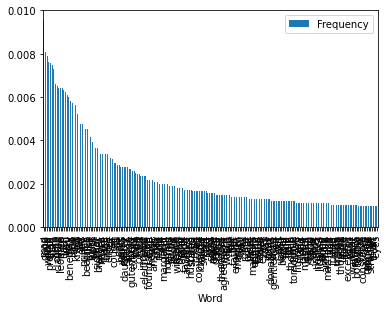

In [10]:
# plot the top 200 highest relative frequency words
rel_freq_df = pd.DataFrame(final_list,columns=['Word','Frequency'])
rel_freq_df.plot.bar(x='Word', y='Frequency', rot=90)

It's hard to interpret words all at once, so instead we are looking at the top and bottom 20 most frequent ones.

<AxesSubplot:xlabel='Word'>

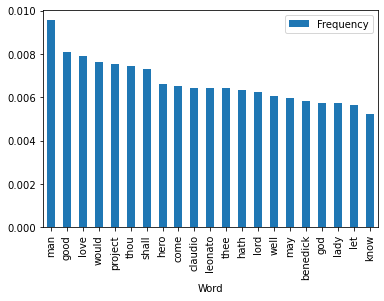

In [11]:
# plot the top 20 higest relative freqency words
rel_freq_df.iloc[0:21].plot.bar(x='Word', y='Frequency', rot=90)

<AxesSubplot:xlabel='Word'>

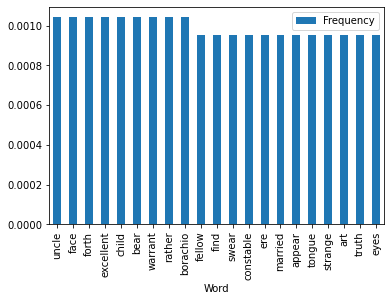

In [12]:
# plot the bottom 20 
rel_freq_df.iloc[179:201].plot.bar(x='Word', y='Frequency', rot=90)

## Zipf’s Law 
Zipf's law states that the frequency of a word type is inversely proportional to its rank. The relative frequency of these words do NOT seem to follow the Zipf's law. Words with the highest relative frequency "man", "good", and "love", are ranked as 1, 2, and 3, respectively, but rank # 1 is not twice as more frequent than rank # 2 and third times more frequent than rank # 3. 

Zipf's law is more likely to be supported by a larger corpus/corpora, whereas the the current analysis is a much small set of text.